In [1]:
using CSV, DataFrames, Plots
#include("src/Idyoms.jl")

using Chakra
using Melch
include("src/Idyoms.jl")
using Main.Idyoms

In [2]:
Melch.__INIT__("/Users/nick/Dropbox/MelchData")

In [3]:
nova = fnd(Melch.id(0),Melch)
nova.description

"Songs and ballads from Nova Scotia, Canada."

In [4]:
melodies = pts(nova)
sequences = [sequence(pts(mel,Melch),Melch) for mel in melodies];

In [5]:
pitch_view = [View(seq,vp(Melch.CPITCH),vp(Melch.CPITCH)) for seq in sequences];

# Parameters

In [6]:
a = Set([54:77...,79,81])
b = Interpolated()
e = A()
u = true
o = Bounded(5)
#o = Unbounded();
idyom_model = "./idyom-data/STMA5I.csv"

"./idyom-data/STMA5I.csv"

# Compute Models

In [7]:
@time pitch_stm = Idyoms.ppm_stm(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_stm)

  1.898350 seconds (13.81 M allocations: 1.401 GiB, 18.28% gc time, 31.59% compilation time)


3.1620058474495836

In [8]:
@time pitch_ltm = Idyoms.ppm_ltm(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_ltm)

  2.955220 seconds (21.39 M allocations: 2.216 GiB, 22.78% gc time, 28.06% compilation time)


3.149688853456989

In [9]:
@time pitch_ltm_plus = Idyoms.ppm_ltm_plus(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_ltm_plus)

  2.504022 seconds (21.92 M allocations: 2.369 GiB, 24.82% gc time, 8.20% compilation time)


2.8782888216781366

In [10]:
@time pitch_both = Idyoms.ppm_both(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_both)

  3.943280 seconds (34.16 M allocations: 3.604 GiB, 19.84% gc time, 14.89% compilation time)


2.544371622597849

In [11]:
@time pitch_both_plus = Idyoms.ppm_both_plus(pitch_view,a,b,e,u,o);
Idyoms.mean_infcontent(pitch_both_plus)

  4.046793 seconds (34.43 M allocations: 3.738 GiB, 33.42% gc time, 2.36% compilation time)


2.503681972956312

# Print Table 

In [12]:
pitch_table = Idyoms.todataframe(pitch_stm)

Row,SeqID,EventID,Symbol,Order,Prob,IC,H
,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,1,1,65,-1,0.0384615,4.70044,4.70044
2,1,2,62,-1,0.0192308,5.70044,3.23156
3,1,3,60,-1,0.0131579,6.24793,3.03184
4,1,4,60,0,0.255102,1.97085,3.06074
5,1,5,60,1,0.623711,0.68105,2.08767
6,1,6,60,2,0.665138,0.588275,1.92745
7,1,7,65,0,0.103306,3.27501,1.79101
8,1,8,65,0,0.135359,2.88514,1.92345
9,1,9,65,1,0.421397,1.24675,1.96885


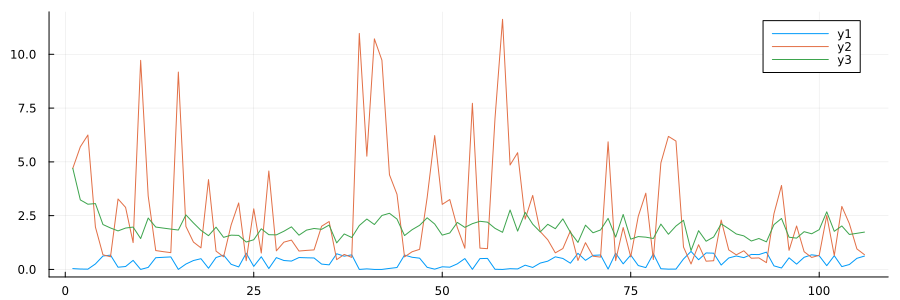

In [13]:
plot(pitch_table.Prob[1:106])
plot!(pitch_table.IC[1:106])
plot!(pitch_table.H[1:106])
plot!(size=(900,300))

# Comparison with IDyOM

In [14]:
idyom_data = CSV.File(idyom_model) |> DataFrame;
idyom_prob = idyom_data[!,"probability"];
idyom_ic = idyom_data[!,"information.content"]
DataFrame(Symbol = pitch_table.Symbol, Idyom = idyom_prob, Julia = pitch_table.Prob)

Row,Symbol,Idyom,Julia
,Int64,Float64,Float64
1,65,0.0384615,0.0384615
2,62,0.0192308,0.0192308
3,60,0.0131579,0.0131579
4,60,0.255102,0.255102
5,60,0.623711,0.623711
6,60,0.665137,0.665138
7,65,0.103306,0.103306
8,65,0.135359,0.135359
9,65,0.421397,0.421397


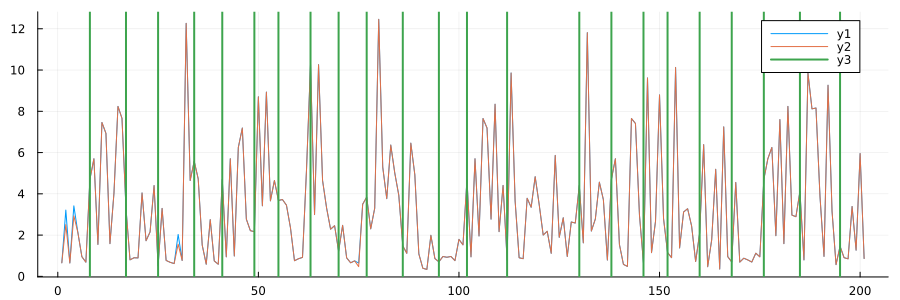

In [15]:
plot(idyom_ic[100:300])
plot!(pitch_table.IC[100:300])
phrases = findall(x->x==1,idyom_data[!,"phrase"][100:300]);
vline!(phrases, lw = 2)
plot!(size=(900,300))

# Multiple Viewpoint Models

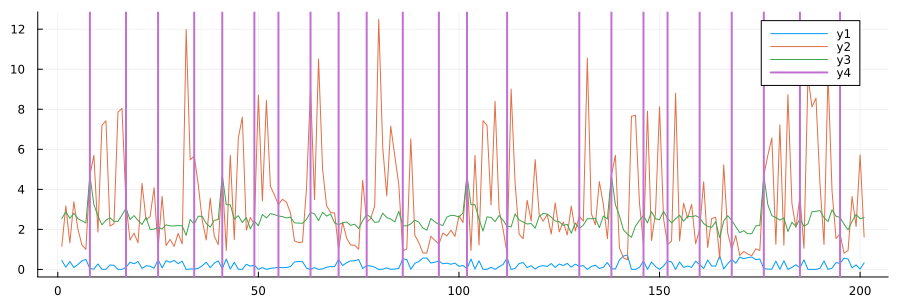

In [16]:
duration_view = [View(seq,vp(Melch.DUR),vp(Melch.CPITCH)) for seq in sequences];
duration_stm = Idyoms.ppm_stm(duration_view,a,b,e,u,o);
pitch_duration_stm = [[Idyoms.combine([p1,p2],0) for (p1,p2) in zip(s,l)] for (s,l) in zip(pitch_stm,duration_stm)];
pitch_duration_table = Idyoms.todataframe(pitch_duration_stm);
plot(pitch_duration_table.Prob[100:300])
plot!(pitch_duration_table.IC[100:300])
plot!(pitch_duration_table.H[100:300])
vline!(phrases, lw = 2)
plot!(size=(900,300))

In [17]:
pdiff = Chakra.diff(vp(Melch.CPITCH))

Chakra.DerivedViewpoint{Int64}(Chakra.LinkedViewpoint{Tuple{Int64, Int64}}(Viewpoint[Chakra.AtomicViewpoint{Int64}(Melch.Attribute{:CPITCH, Int64}(), Type[Int64]), Chakra.DelayedViewpoint{Int64}(Chakra.AtomicViewpoint{Int64}(Melch.Attribute{:CPITCH, Int64}(), Type[Int64]), 1)], DataType[Int64, Int64]), Chakra.var"#44#45"(), #undef)

In [18]:
vp_map(pdiff,sequences[1])

106-element Vector{Option{Int64}}:
   Chakra.None()
 -3
 -2
  0
  0
  0
  5
  0
  0
  4
  0
  0
  0
  ⋮
 -2
 -2
 -3
  0
  0
  0
 -2
 -2
  2
  2
 -4
  0